## Pandas: access to the remote json from MongoDB
- The json file is generated on the fly from the express server of Node.js.
- The data stored in MongoDB are saved in the json file.
- The IMU data are composed of nine time series; acceleration, gyroscope, and magnetic field.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc

## [실시간 데이터 로드]
- loading real-time json file from MongoDB via web

- http://life21c.inje.ac.kr:3030/client_33imu_gauge.html

In [3]:
# loading real-time json file from MongoDB via web (CORS, port=3030)
url="http://life21c.inje.ac.kr:3030/iot"
df=pd.read_json(url)
print('Large IoT data was retrieved successfully from MongoDB!')

Large IoT data was retrieved successfully from MongoDB!


In [4]:
df.head()

,_id,date,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,mag_x,mag_y,mag_z,__v
0,639a7a5d2f1ab8f42ac826c8,2022-12-15 10:37:33.724,0.03,-0.01,0.99,-0.18,-3.54,-0.31,-12.12,16.19,-42.16,0
1,639a7a5e2f1ab8f42ac826ca,2022-12-15 10:37:34.233,0.03,-0.01,0.99,-0.24,-3.60,-0.24,-11.82,16.52,-41.88,0
2,639a7a5e2f1ab8f42ac826cc,2022-12-15 10:37:34.742,0.03,-0.01,0.99,-0.06,-3.54,-0.24,-12.05,16.16,-41.75,0
3,639a7a5f2f1ab8f42ac826ce,2022-12-15 10:37:35.251,0.03,-0.01,0.99,-0.24,-3.48,-0.31,-12.06,16.21,-41.61,0
4,639a7a5f2f1ab8f42ac826d0,2022-12-15 10:37:35.760,0.03,-0.01,0.99,-0.24,-3.54,-0.31,-12.00,16.31,-42.70,0


In [5]:
df.tail()

,_id,date,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,mag_x,mag_y,mag_z,__v
30243,639ab6b52eb916f872310454,2022-12-15 14:55:01.994,0.04,-0.01,0.99,-0.24,-3.42,-0.24,-12.23,-1.86,-55.53,0
30244,639ab6b62eb916f872310456,2022-12-15 14:55:02.503,0.04,-0.01,0.99,-0.18,-3.54,-0.31,-12.13,-1.94,-55.22,0
30245,639ab6b72eb916f872310458,2022-12-15 14:55:03.012,0.03,-0.00,0.99,-0.18,-3.78,-0.37,-12.21,-1.76,-55.27,0
30246,639ab6b72eb916f87231045a,2022-12-15 14:55:03.521,0.04,-0.00,0.99,-0.24,-3.60,-0.31,-12.04,-2.33,-55.14,0
30247,639ab6b82eb916f87231045c,2022-12-15 14:55:04.030,0.03,-0.01,0.99,-0.12,-3.48,-0.18,-11.62,-2.51,-56.38,0


In [6]:
df.shape, type(df)

((30248, 12), pandas.core.frame.DataFrame)

In [7]:
df['date'][:1],df['date'][-1:]

(0   2022-12-15 10:37:33.724
 Name: date, dtype: datetime64[ns], 30247   2022-12-15 14:55:04.030
 Name: date, dtype: datetime64[ns])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30248 entries, 0 to 30247
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   _id      30248 non-null  object        
 1   date     30248 non-null  datetime64[ns]
 2   accel_x  30248 non-null  float64       
 3   accel_y  30248 non-null  float64       
 4   accel_z  30248 non-null  float64       
 5   gyro_x   30248 non-null  float64       
 6   gyro_y   30248 non-null  float64       
 7   gyro_z   30248 non-null  float64       
 8   mag_x    30248 non-null  float64       
 9   mag_y    30248 non-null  float64       
 10  mag_z    30248 non-null  float64       
 11  __v      30248 non-null  int64         
dtypes: datetime64[ns](1), float64(9), int64(1), object(1)
memory usage: 2.8+ MB


In [9]:
df.describe()

,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,mag_x,mag_y,mag_z,__v
count,30248.000000,30248.000000,30248.000000,30248.000000,30248.000000,30248.000000,30248.000000,30248.000000,30248.000000,30248.0
mean,-0.008660,-0.003551,0.938278,-0.017817,-3.211027,-0.306169,-3.407866,2.292286,-50.722629,0.0
std,0.230791,0.156680,0.238212,45.409563,37.463703,29.427504,11.837439,11.463100,15.980722,0.0
min,-2.900000,-2.250000,-1.600000,-909.550000,-613.160000,-480.350000,-47.270000,-26.550000,-103.260000,0.0
25%,0.010000,-0.010000,0.990000,-0.310000,-3.600000,-0.370000,-11.490000,-5.800000,-55.300000,0.0
50%,0.030000,-0.000000,0.990000,-0.240000,-3.540000,-0.310000,-7.590000,-1.880000,-53.690000,0.0
75%,0.030000,0.000000,0.990000,-0.180000,-3.420000,-0.240000,1.480000,7.600000,-46.120000,0.0
max,1.400000,1.680000,2.510000,1258.610000,663.150000,421.870000,35.130000,45.080000,38.240000,0.0


## Check data
- NaN
- missing value

In [10]:
df.isnull().sum() #/df.shape[0]*100

_id        0
date       0
accel_x    0
accel_y    0
accel_z    0
gyro_x     0
gyro_y     0
gyro_z     0
mag_x      0
mag_y      0
mag_z      0
__v        0
dtype: int64

In [11]:
df.isna().sum()

_id        0
date       0
accel_x    0
accel_y    0
accel_z    0
gyro_x     0
gyro_y     0
gyro_z     0
mag_x      0
mag_y      0
mag_z      0
__v        0
dtype: int64

## Replace NaN with mean: Imputation
- NaN ==>> mean, 33.3 (100/3)

In [ ]:
# df=df.fillna(33.3)
# df.isna().sum()

## IoT data were cleaned!

In [13]:
# Save cleaned iot data in csv file.
df.to_csv('iot33imu_data_cleaned_221215_raw.csv')

In [14]:
df.head()

,_id,date,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,mag_x,mag_y,mag_z,__v
0,639a7a5d2f1ab8f42ac826c8,2022-12-15 10:37:33.724,0.03,-0.01,0.99,-0.18,-3.54,-0.31,-12.12,16.19,-42.16,0
1,639a7a5e2f1ab8f42ac826ca,2022-12-15 10:37:34.233,0.03,-0.01,0.99,-0.24,-3.60,-0.24,-11.82,16.52,-41.88,0
2,639a7a5e2f1ab8f42ac826cc,2022-12-15 10:37:34.742,0.03,-0.01,0.99,-0.06,-3.54,-0.24,-12.05,16.16,-41.75,0
3,639a7a5f2f1ab8f42ac826ce,2022-12-15 10:37:35.251,0.03,-0.01,0.99,-0.24,-3.48,-0.31,-12.06,16.21,-41.61,0
4,639a7a5f2f1ab8f42ac826d0,2022-12-15 10:37:35.760,0.03,-0.01,0.99,-0.24,-3.54,-0.31,-12.00,16.31,-42.70,0


## New DataFrame : iot_data
### Dataframe with date and ax,ay,az,gx,gy,gz,mx,my,mz

### [DIY-1] 

In [21]:
#  [DIY-1] select columns
cols = ['date', 'accel_x',	'accel_y',	'accel_z',	'gyro_x',	'gyro_y',	'gyro_z',	'mag_x'	,'mag_y',	'mag_z']

In [22]:
# Make iot data
iot_data = df[cols]

In [23]:
iot_data.shape

(30248, 10)

In [24]:
iot_data.head()  # date와 9 개의 신호를 확인.

,date,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,mag_x,mag_y,mag_z
0,2022-12-15 10:37:33.724,0.03,-0.01,0.99,-0.18,-3.54,-0.31,-12.12,16.19,-42.16
1,2022-12-15 10:37:34.233,0.03,-0.01,0.99,-0.24,-3.60,-0.24,-11.82,16.52,-41.88
2,2022-12-15 10:37:34.742,0.03,-0.01,0.99,-0.06,-3.54,-0.24,-12.05,16.16,-41.75
3,2022-12-15 10:37:35.251,0.03,-0.01,0.99,-0.24,-3.48,-0.31,-12.06,16.21,-41.61
4,2022-12-15 10:37:35.760,0.03,-0.01,0.99,-0.24,-3.54,-0.31,-12.00,16.31,-42.70


In [25]:
iot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30248 entries, 0 to 30247
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     30248 non-null  datetime64[ns]
 1   accel_x  30248 non-null  float64       
 2   accel_y  30248 non-null  float64       
 3   accel_z  30248 non-null  float64       
 4   gyro_x   30248 non-null  float64       
 5   gyro_y   30248 non-null  float64       
 6   gyro_z   30248 non-null  float64       
 7   mag_x    30248 non-null  float64       
 8   mag_y    30248 non-null  float64       
 9   mag_z    30248 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 2.3 MB


In [26]:
iot_data.isna().sum()

date       0
accel_x    0
accel_y    0
accel_z    0
gyro_x     0
gyro_y     0
gyro_z     0
mag_x      0
mag_y      0
mag_z      0
dtype: int64

In [27]:
# Save iot data in csv file.
iot_data.to_csv('iot_nano33imu_221215.csv')

## EDA (Exploratory Data Analysis, 탐색적 자료 분석) 

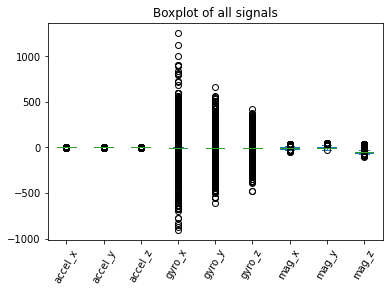

In [28]:
# Plot boxplot
iot_data.iloc[:,1:].plot.box(title='Boxplot of all signals')
plt.xticks(rotation=60)
plt.show()

### Plot time series of sensor data

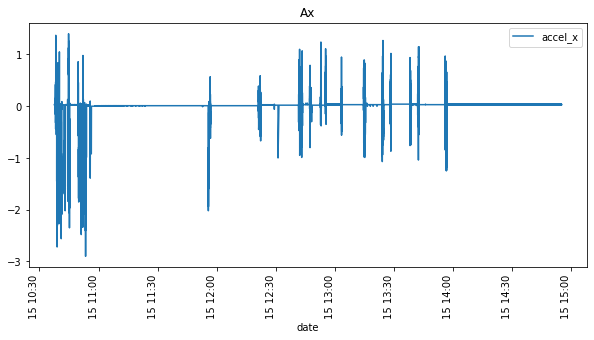

In [29]:
iot_data.plot(x='date', y='accel_x', figsize=(10,5), title='Ax')
plt.xticks(rotation=90)
plt.show()

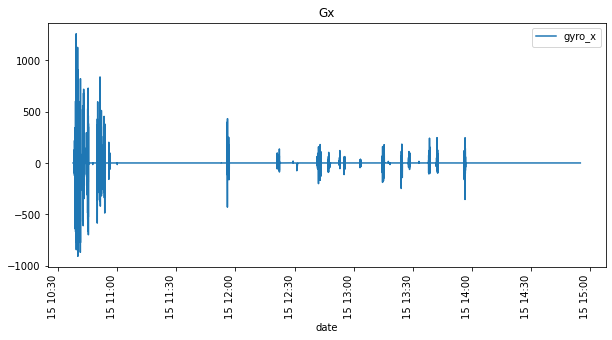

In [30]:
iot_data.plot(x='date', y='gyro_x', figsize=(10,5), title='Gx')
plt.xticks(rotation=90)
plt.show()

#### 다중그래프 (multiple graphs)

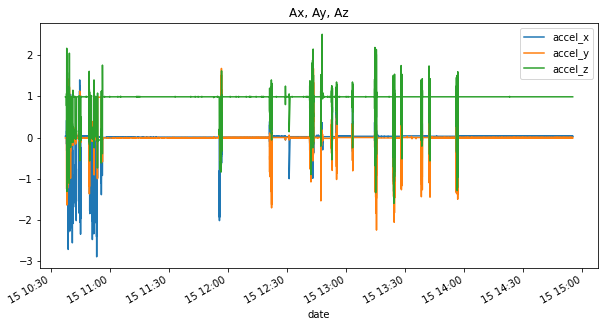

In [31]:
# 3축 가속도를 아래에 그리시오.
iot_data.plot(x='date', y=['accel_x','accel_y','accel_z'], figsize=(10,5), title='Ax, Ay, Az')

### [DIY-2] 

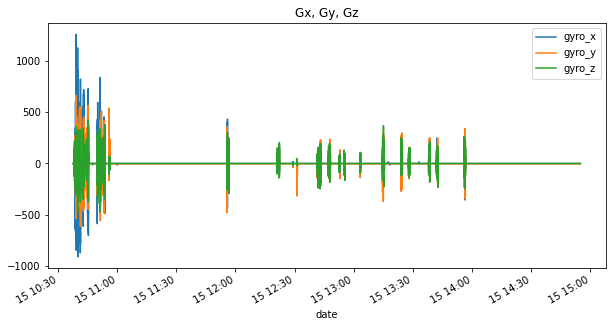

In [32]:
# 3축 자이로 신호를 아래에 그리시오.
iot_data.plot(x='date', y=['gyro_x','gyro_y','gyro_z'] , figsize=(10,5), title='Gx, Gy, Gz')

### [DIY-3] 

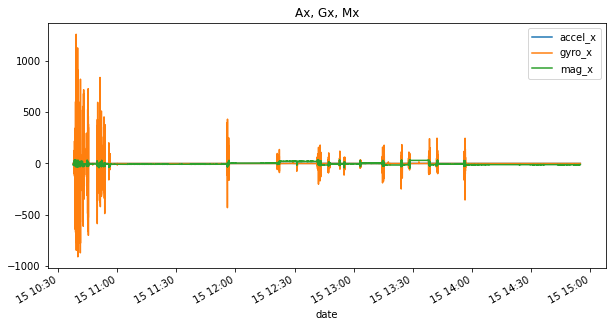

In [33]:
# Ax, Gx,Mx 신호를 아래에 그리시오.
iot_data.plot(x='date', y =['accel_x','gyro_x','mag_x'], figsize=(10,5), title='Ax, Gx, Mx')

### Plot the mean of sensor data
### [DIY-4] 아래 코드를 참조해서 Az,Gz,Mz의 평균을 구하고 막대 그래프로 그리시오.

In [35]:
iot_data[['accel_z','gyro_z','mag_z']].mean()  

accel_z     0.938278
gyro_z     -0.306169
mag_z     -50.722629
dtype: float64

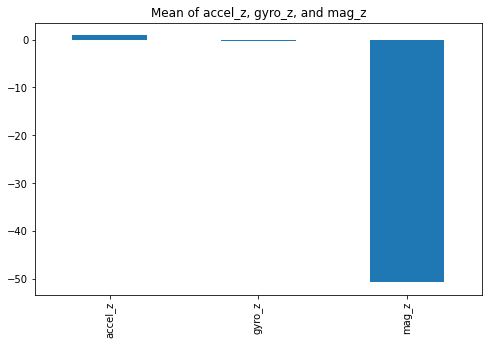

In [36]:
iot_data[['accel_z','gyro_z','mag_z']].mean().plot.bar(figsize=(8,5), 
                                                                  title="Mean of accel_z, gyro_z, and mag_z")

# Advanced graphics using pandas

### Plot the change of sensor data over various time spans.

> time span: 60 sec, 1 hour, 1 day, $\cdots$

In [37]:
iot_data.head()

,date,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,mag_x,mag_y,mag_z
0,2022-12-15 10:37:33.724,0.03,-0.01,0.99,-0.18,-3.54,-0.31,-12.12,16.19,-42.16
1,2022-12-15 10:37:34.233,0.03,-0.01,0.99,-0.24,-3.60,-0.24,-11.82,16.52,-41.88
2,2022-12-15 10:37:34.742,0.03,-0.01,0.99,-0.06,-3.54,-0.24,-12.05,16.16,-41.75
3,2022-12-15 10:37:35.251,0.03,-0.01,0.99,-0.24,-3.48,-0.31,-12.06,16.21,-41.61
4,2022-12-15 10:37:35.760,0.03,-0.01,0.99,-0.24,-3.54,-0.31,-12.00,16.31,-42.70


#### Set date as index of timestamp

In [38]:
iot_data.set_index('date',inplace=True)

In [39]:
iot_data.head()

,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,mag_x,mag_y,mag_z
date,,,,,,,,,
2022-12-15 10:37:33.724,0.03,-0.01,0.99,-0.18,-3.54,-0.31,-12.12,16.19,-42.16
2022-12-15 10:37:34.233,0.03,-0.01,0.99,-0.24,-3.60,-0.24,-11.82,16.52,-41.88
2022-12-15 10:37:34.742,0.03,-0.01,0.99,-0.06,-3.54,-0.24,-12.05,16.16,-41.75
2022-12-15 10:37:35.251,0.03,-0.01,0.99,-0.24,-3.48,-0.31,-12.06,16.21,-41.61
2022-12-15 10:37:35.760,0.03,-0.01,0.99,-0.24,-3.54,-0.31,-12.00,16.31,-42.70


In [40]:
iot_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30248 entries, 2022-12-15 10:37:33.724000 to 2022-12-15 14:55:04.030000
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   accel_x  30248 non-null  float64
 1   accel_y  30248 non-null  float64
 2   accel_z  30248 non-null  float64
 3   gyro_x   30248 non-null  float64
 4   gyro_y   30248 non-null  float64
 5   gyro_z   30248 non-null  float64
 6   mag_x    30248 non-null  float64
 7   mag_y    30248 non-null  float64
 8   mag_z    30248 non-null  float64
dtypes: float64(9)
memory usage: 2.3 MB


In [41]:
# Convert date index to Datetime index, 중요!!!
iot_data.index = pd.to_datetime(iot_data.index)

In [42]:
iot_data.info() # Range index -> timestamp(Datetime) index 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30248 entries, 2022-12-15 10:37:33.724000 to 2022-12-15 14:55:04.030000
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   accel_x  30248 non-null  float64
 1   accel_y  30248 non-null  float64
 2   accel_z  30248 non-null  float64
 3   gyro_x   30248 non-null  float64
 4   gyro_y   30248 non-null  float64
 5   gyro_z   30248 non-null  float64
 6   mag_x    30248 non-null  float64
 7   mag_y    30248 non-null  float64
 8   mag_z    30248 non-null  float64
dtypes: float64(9)
memory usage: 2.3 MB


In [43]:
# Estimate the mean of the iot data for every minute
iot_data.resample('60S').mean()

,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,mag_x,mag_y,mag_z
date,,,,,,,,,
2022-12-15 10:37:00,0.030000,-0.010000,0.990000,-0.209808,-3.557308,-0.279423,-11.958846,16.287692,-42.217885
2022-12-15 10:38:00,-0.188898,-0.413898,0.164322,13.618898,6.464746,12.954153,2.220085,23.822458,-11.327034
2022-12-15 10:39:00,-1.056949,0.154237,0.225932,-8.265424,-25.913983,-26.685678,-11.120339,8.269661,-19.876525
2022-12-15 10:40:00,-0.502119,0.141186,0.332542,15.531525,11.551102,-14.099915,-4.763475,-1.187881,-22.533136
2022-12-15 10:41:00,-0.499322,0.028136,0.655424,-5.107034,5.616356,-5.345508,6.075254,0.390000,-29.213475
...,...,...,...,...,...,...,...,...,...
2022-12-15 14:51:00,0.032881,-0.002034,0.990000,-0.231017,-3.496780,-0.285508,-11.865847,-1.868644,-55.193220
2022-12-15 14:52:00,0.033051,-0.002288,0.990000,-0.218220,-3.486102,-0.272203,-12.032119,-1.986017,-55.341695
2022-12-15 14:53:00,0.034322,-0.001949,0.990000,-0.233051,-3.456864,-0.290508,-12.093390,-2.104746,-55.431525


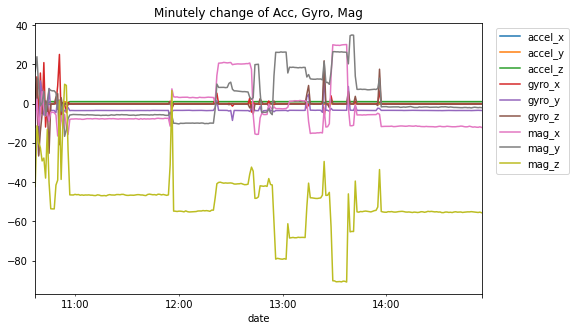

In [44]:
#  Plot mean of the all iot data per every minute
iot_data.resample('60S').mean().plot(figsize=(8,5), 
                                     title='Minutely change of Acc, Gyro, Mag')
plt.legend(bbox_to_anchor=(1.02, 1.0))

### [DIY-5]  아래 코드를 참조해서 Ay,Gy,My의 2분 평균값의 변화를 보여 주는 그래프를 그리시오.

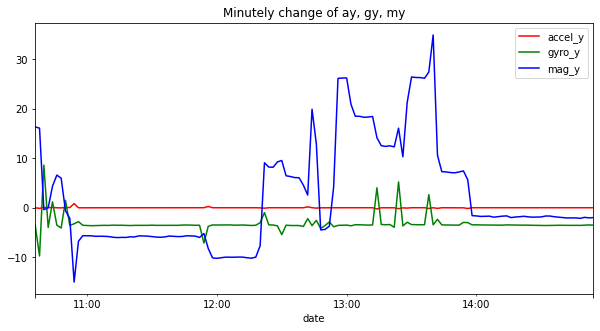

In [45]:
#  Plot mean of the iot data per every minute
iot_data[['accel_y', 'gyro_y', 'mag_y']].resample('120S').mean().plot(figsize=(10,5), 
                                     title='Minutely change of ay, gy, my',
                                     color="rgb")

### 시간 평균 변화화

In [46]:
# Estimate the mean of iot data for every hour
iot_data.resample('H').mean()  # mean per each hour

,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,mag_x,mag_y,mag_z
date,,,,,,,,,
2022-12-15 10:00:00,-0.320563,0.076382,0.579894,1.693323,-2.134076,-3.226756,-7.121592,0.531032,-29.040688
2022-12-15 11:00:00,0.002012,-0.000222,0.967131,-0.238344,-3.671893,-0.307642,-7.015582,-6.014492,-45.789966
2022-12-15 12:00:00,0.024788,-0.005139,0.977710,-0.122556,-3.427648,-0.323146,6.402508,1.514480,-48.794594
2022-12-15 13:00:00,0.024613,-0.036221,0.957138,-0.111117,-2.655848,0.802740,-0.487884,15.834458,-61.563330
2022-12-15 14:00:00,0.034653,-0.002449,0.990002,-0.260695,-3.520152,-0.304584,-11.670667,-1.859592,-55.188115


In [47]:
iot_data.resample('H').mean().shape, iot_data.resample('H').mean().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2022-12-15 10:00:00 to 2022-12-15 14:00:00
Freq: H
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   accel_x  5 non-null      float64
 1   accel_y  5 non-null      float64
 2   accel_z  5 non-null      float64
 3   gyro_x   5 non-null      float64
 4   gyro_y   5 non-null      float64
 5   gyro_z   5 non-null      float64
 6   mag_x    5 non-null      float64
 7   mag_y    5 non-null      float64
 8   mag_z    5 non-null      float64
dtypes: float64(9)
memory usage: 400.0 bytes


((5, 9), None)

In [48]:
#  Plot mean of the iot data per every hour 
iot_data.resample('H').mean().plot(figsize=(10,6), '-o'
                                   title='Hourly change of all sensor data') #, 
                                #    ylim=[0,500])

SyntaxError: ignored

### [DIY-6]  아래 코드를 참조해서 Az,Gz,Mz의 1 시간 평균값의 변화를 보여 주는 그래프를 그리시오.

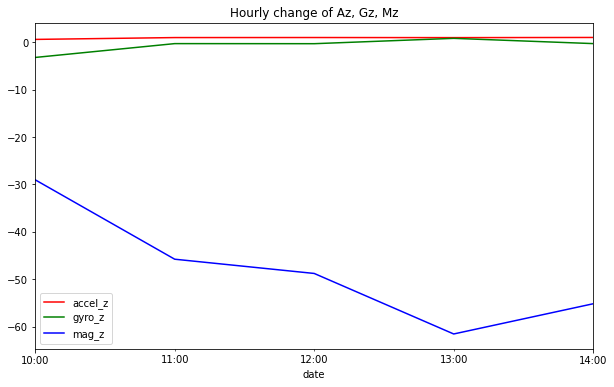

In [50]:
#  Plot mean of the iot data per every minute
iot_data[['accel_z', 'gyro_z', 'mag_z']].resample('1H').mean().plot(figsize=(10,6), 
                                    color = ['red', 'green', 'blue'],
                                    title='Hourly change of Az, Gz, Mz')

### Good Job!  Have a great winter vacation!!!

----